In [43]:
# load packages
import pandas as pd
%matplotlib inline
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments


In [44]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [45]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
df.head()

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


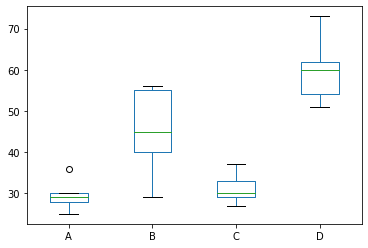

In [46]:
df.boxplot(column=['A', 'B', 'C', 'D'], grid=False)

In [47]:
f_value, p_value = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(f_value, p_value)

17.492810457516338 2.639241146210922e-05


In [48]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_melt.head()

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29


In [49]:
model = ols('value ~ C(variable)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [22]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
df_two = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
df_two.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


In [25]:
df_two_melt = pd.melt(df_two, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
df_two_melt.head()

,Genotype,variable,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


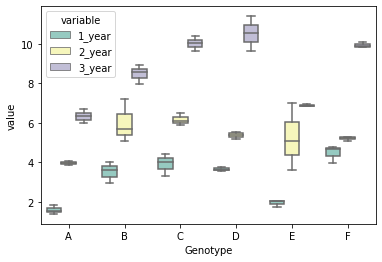

In [27]:
sns.boxplot(x="Genotype", y="value", hue="variable", data=df_two_melt, palette="Set3") 


In [32]:
model = ols('value ~ C(Genotype) + C(variable) + C(Genotype):C(variable)', data=df_two_melt).fit()

In [33]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(variable),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(variable),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN
